In [1]:
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

## Prepare Data

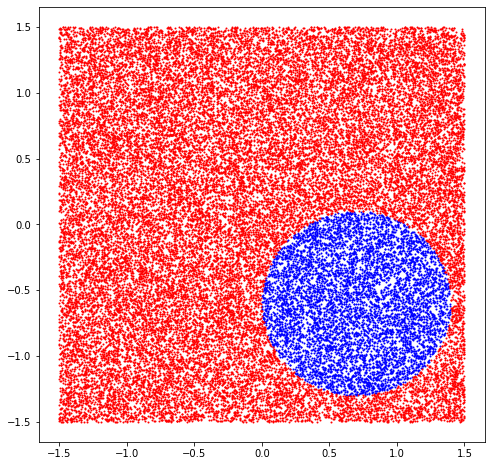

In [2]:
N=40000
L=3
X = L*np.random.rand(N,2) 
X[:,0] = X[:,0]-L/2
X[:,1] = X[:,1]-L/2

Y = np.zeros([N,2])

for i in range(N):
    if (X[i,0]-0.7)**2+(X[i,1]+0.6)**2<0.49:
        Y[i,0]=1
    else:
        Y[i,1]=1

zero_class = np.where(Y[:, 0])
one_class = np.where(Y[:, 1])

plt.figure(figsize=(8, 8))
plt.scatter(X[zero_class, 0], X[zero_class, 1], s=1, facecolors='b', linewidths=1, label='Class 1')
plt.scatter(X[one_class, 0], X[one_class, 1], s=1, facecolors='r', linewidths=1, label='Class 2')
plt.show()

data = X
labels = Y

In [ ]:
import os
import activation_plot as aplt

first_layer = [2,3,4,5,6,7,8,9,10,20,30,60,90,180]
#second_layer = [30,60,90]

num_epoch = 100
X_test = aplt.data_grid(grid=200,square_len=2)
colors = aplt.get_color(X_test)

for i in range(len(first_layer)):
#     for j in range(len(second_layer)):
#         print('hid_layer: [%i , %i]'%(first_layer[i],second_layer[j]))
#         print('progress :', (i+j)/(len(first_layer)+len(second_layer)))
#         hid_layer_units = [first_layer[i], second_layer[j]]
    print('hid_layer: [%i]'%(first_layer[i]))
    print('progress :', i/(len(first_layer)))
    hid_layer_units = [first_layer[i]]
    model = aplt.prepare_model(hid_layer_units,n_category = len(labels[0]))

    net_name = '_'.join(str(e) for e in hid_layer_units)+'_2'
    model_name = 'model_'+net_name
    result_dir = 'iterasive_result/'+model_name
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    model_data_labels = [model, data, labels]
    aplt.get_activation_prediction_transition(result_dir,num_epoch,X_test,model_data_labels)

hid_layer: [2]
progress : 0.0


# visualize activation

In [1]:
import activation_plot as aplt
import os
X_test = aplt.data_grid(grid=200,square_len=2)
colors = aplt.get_color(X_test)

if __name__ == '__main__':
    first_layer = [2,5]
    data_path_list = []
    for i in first_layer:
        path = 'iterasive_result/model_'+str(i)+'_2'
        if os.path.exists(path):
            data_path_list.append(path)
    for data_path in data_path_list:
        aplt.plot_data(data_path,X_test,colors)

Process iterasive_result/model_2_2
Process iterasive_result/model_5_2
